In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

### load and clean recent_grads and grad_students datasets

In [2]:
# recent_grads
recent_grads = pd.read_csv('data/recent-grads.csv')

to_drop = ['Rank','Full_time_year_round', 'Unemployment_rate','ShareWomen', 'P25th','P75th',
           'Sample_size']
recent_grads.drop(to_drop, axis=1, inplace=True)
recent_grads['Major_code'] = recent_grads['Major_code'].apply(str)

recent_grads.dropna(subset = ['Total'], inplace=True)
recent_grads.isna().sum()
recent_grads.astype({'Total': 'int64', 'Men': 'int64', 'Women': 'int64'}).dtypes

recent_grads = recent_grads.rename(columns={'Median': 'Median_income'})

# Convert major name to title case
recent_grads['Major'] = recent_grads['Major'].str.title()

# Get short names of majors
recent_grads['Total'] = recent_grads['Total'].apply(np.int64)
recent_grads['Men'] = recent_grads['Men'].apply(np.int64)
recent_grads['Women'] = recent_grads['Women'].apply(np.int64)
major_list = pd.read_csv('data/major_short_names.csv')
recent_grads = pd.merge(major_list, recent_grads, how='right')
recent_grads.rename(columns={'Major':'Major_long', 'Major_short':'Major', 'Low_wage_jobs':'income: low-wage'}, inplace=True)
recent_grads['income: other'] = recent_grads['Employed'] - recent_grads['income: low-wage']

In [3]:
recent_grads.head()

,Major_category,Major_long,Major,Major_code,Total,Men,Women,Employed,Full_time,Part_time,Unemployed,Median_income,College_jobs,Non_college_jobs,income: low-wage,income: other
0,Engineering,Petroleum Engineering,Petroleum Eng.,2419,2339,2057,282,1976,1849,270,37,110000,1534,364,193,1783
1,Engineering,Mining And Mineral Engineering,Mining & Mineral Eng.,2416,756,679,77,640,556,170,85,75000,350,257,50,590
2,Engineering,Metallurgical Engineering,Metallurgical Eng.,2415,856,725,131,648,558,133,16,73000,456,176,0,648
3,Engineering,Naval Architecture And Marine Engineering,Naval Architecture & Marine Eng.,2417,1258,1123,135,758,1069,150,40,70000,529,102,0,758
4,Engineering,Chemical Engineering,Chemical Eng.,2405,32260,21239,11021,25694,23170,5180,1672,65000,18314,4440,972,24722


In [4]:
recent_grads.dtypes

Major_category      object
Major_long          object
Major               object
Major_code          object
Total                int64
Men                  int64
Women                int64
Employed             int64
Full_time            int64
Part_time            int64
Unemployed           int64
Median_income        int64
College_jobs         int64
Non_college_jobs     int64
income: low-wage     int64
income: other        int64
dtype: object

In [5]:
grad_students = pd.read_csv('data/grad-students.csv')

In [6]:
grad_students.columns

Index(['Major_code', 'Major', 'Major_category', 'Grad_total',
       'Grad_sample_size', 'Grad_employed', 'Grad_full_time_year_round',
       'Grad_unemployed', 'Grad_unemployment_rate', 'Grad_median', 'Grad_P25',
       'Grad_P75', 'Nongrad_total', 'Nongrad_employed',
       'Nongrad_full_time_year_round', 'Nongrad_unemployed',
       'Nongrad_unemployment_rate', 'Nongrad_median', 'Nongrad_P25',
       'Nongrad_P75', 'Grad_share', 'Grad_premium'],
      dtype='object')

In [7]:
to_drop = ['Major_code', 'Grad_sample_size', 'Grad_P25', 'Grad_P75',  'Nongrad_P25', 'Nongrad_P75', 'Grad_share', 'Grad_premium', 'Nongrad_full_time_year_round', 'Nongrad_median']
grad_students.drop(to_drop, axis=1, inplace=True)
grad_students.isna().sum()

Major                        0
Major_category               0
Grad_total                   0
Grad_employed                0
Grad_full_time_year_round    0
Grad_unemployed              0
Grad_unemployment_rate       0
Grad_median                  0
Nongrad_total                0
Nongrad_employed             0
Nongrad_unemployed           0
Nongrad_unemployment_rate    0
dtype: int64

In [8]:
grad_students.rename(columns={ 'Grad_full_time_year_round': 'Grad_full_time','Nongrad_employed':'Grad_non_college_jobs', 'Grad_median':'Grad_median_income'}, inplace=True)
grad_students['Grad_part_time'] = grad_students['Grad_employed'] - grad_students['Grad_full_time']
grad_students['Grad_median_income'] = grad_students['Grad_median_income'].apply(np.int64)
grad_students.head()

,Major,Major_category,Grad_total,Grad_employed,Grad_full_time,Grad_unemployed,Grad_unemployment_rate,Grad_median_income,Nongrad_total,Grad_non_college_jobs,Nongrad_unemployed,Nongrad_unemployment_rate,Grad_part_time
0,CONSTRUCTION SERVICES,Industrial Arts & Consumer Services,9173,7098,6511,681,0.087543,75000,86062,73607,3928,0.050661,587
1,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,53864,40492,29553,2482,0.057756,60000,461977,347166,25484,0.068386,10939
2,HOSPITALITY MANAGEMENT,Business,24417,18368,14784,1465,0.073867,65000,179335,145597,7409,0.048423,3584
3,COSMETOLOGY SERVICES AND CULINARY ARTS,Industrial Arts & Consumer Services,5411,3590,2701,316,0.080901,47000,37575,29738,1661,0.052900,889
4,COMMUNICATION TECHNOLOGIES,Computers & Mathematics,9109,7512,5622,466,0.058411,57000,53819,43163,3389,0.072800,1890


### pivot tables for visualizations

#### recent_grads

In [9]:
recent_grads['Percent_employed'] = recent_grads['Employed'] / (recent_grads['Employed'] + recent_grads['Unemployed'])
recent_grads['Percent_college_jobs'] = recent_grads['College_jobs'] / (recent_grads['College_jobs'] + recent_grads['Non_college_jobs'])
recent_grads['Percent_non_college_jobs'] = recent_grads['Non_college_jobs'] / (recent_grads['College_jobs'] + recent_grads['Non_college_jobs'])
recent_grads['Total_income'] = recent_grads['Median_income'] * recent_grads['Full_time']
recent_grads['Percent_low_wage_jobs'] = recent_grads['income: low-wage'] / (recent_grads['College_jobs'] + recent_grads['Non_college_jobs'] + recent_grads['income: low-wage'])
recent_grads.head()

,Major_category,Major_long,Major,Major_code,Total,Men,Women,Employed,Full_time,Part_time,...,Median_income,College_jobs,Non_college_jobs,income: low-wage,income: other,Percent_employed,Percent_college_jobs,Percent_non_college_jobs,Total_income,Percent_low_wage_jobs
0,Engineering,Petroleum Engineering,Petroleum Eng.,2419,2339,2057,282,1976,1849,270,...,110000,1534,364,193,1783,0.981619,0.808219,0.191781,203390000,0.092300
1,Engineering,Mining And Mineral Engineering,Mining & Mineral Eng.,2416,756,679,77,640,556,170,...,75000,350,257,50,590,0.882759,0.576606,0.423394,41700000,0.076104
2,Engineering,Metallurgical Engineering,Metallurgical Eng.,2415,856,725,131,648,558,133,...,73000,456,176,0,648,0.975904,0.721519,0.278481,40734000,0.000000
3,Engineering,Naval Architecture And Marine Engineering,Naval Architecture & Marine Eng.,2417,1258,1123,135,758,1069,150,...,70000,529,102,0,758,0.949875,0.838352,0.161648,74830000,0.000000
4,Engineering,Chemical Engineering,Chemical Eng.,2405,32260,21239,11021,25694,23170,5180,...,65000,18314,4440,972,24722,0.938902,0.804869,0.195131,1506050000,0.040968


In [10]:
df_cat = recent_grads.groupby('Major_category').agg({'Median_income': 'mean', 'Total': 'sum', 'Men': 'sum', 'Women': 'sum',
                    'Employed': 'sum', 'Unemployed': 'sum', 'Full_time': 'sum', 'College_jobs': 'sum',
                    'Non_college_jobs': 'sum', 'income: low-wage': 'sum'})
df_cat.reset_index(level=0, inplace=True)

# See note above about the approximation of median income by category
#df_cat['Median_income'] = round(df_cat['Median_income'] / df_cat['Full_time'])
df_cat['Percent_employed'] = (df_cat['Employed'] / (df_cat['Employed'] + df_cat['Unemployed']))*100
df_cat['Percent_unemployed'] = (df_cat['Unemployed'] / (df_cat['Employed'] + df_cat['Unemployed']))*100
df_cat['Percent_men'] = (df_cat['Men'] / (df_cat['Men'] + df_cat['Women']))*100
df_cat['Percent_women'] = (df_cat['Women'] / (df_cat['Men'] + df_cat['Women']))*100
df_cat['Percent_college_jobs'] = (df_cat['College_jobs'] / (df_cat['College_jobs'] + df_cat['Non_college_jobs']))*100
df_cat['Percent_non_college_jobs'] = (df_cat['Non_college_jobs'] / (df_cat['College_jobs'] + df_cat['Non_college_jobs']))*100
df_cat['Percent_low_wage_jobs'] = df_cat['income: low-wage'] / (df_cat['College_jobs'] + df_cat['Non_college_jobs'] + df_cat['income: low-wage'])
df_cat.head()

,Major_category,Median_income,Total,Men,Women,Employed,Unemployed,Full_time,College_jobs,Non_college_jobs,income: low-wage,Percent_employed,Percent_unemployed,Percent_men,Percent_women,Percent_college_jobs,Percent_non_college_jobs,Percent_low_wage_jobs
0,Agriculture & Natural Resources,35111.111111,75620,40357,35263,63794,3486,55585,18677,33217,7414,94.818668,5.181332,53.368157,46.631843,35.990673,64.009327,0.125008
1,Arts,33062.500000,357130,134390,222740,288114,28228,207773,94785,163720,60116,91.076746,8.923254,37.630555,62.369445,36.666602,63.333398,0.188676
2,Biology & Life Science,36421.428571,453862,184919,268943,302797,22854,240377,151233,127182,42742,92.982057,7.017943,40.743442,59.256558,54.319272,45.680728,0.133088
3,Business,43538.461538,1302376,667852,634524,1088742,79877,988870,148538,496570,126788,93.164838,6.835162,51.279508,48.720492,23.025292,76.974708,0.164255
4,Communications & Journalism,34500.000000,392601,131921,260680,330660,26852,273330,86556,172992,49595,92.489203,7.510797,33.601799,66.398201,33.348745,66.651255,0.160427


In [11]:
# Major categories sorted by median income - used to keep the same sorting as the other chart
sorted_categories = df_cat.sort_values(by=['Median_income'], ascending=False)['Major_category'].tolist()

In [12]:
# Required for stacked bar chart: Data set with separate rows for "Percent_employed" and "Percent_unemployed"
df_cat_E = pd.melt(df_cat, id_vars=['Major_category', 'Median_income'], value_vars=['Percent_employed', 'Percent_unemployed'], 
        var_name='Status', value_name='Percentage')
df_cat_E.head()

,Major_category,Median_income,Status,Percentage
0,Agriculture & Natural Resources,35111.111111,Percent_employed,94.818668
1,Arts,33062.500000,Percent_employed,91.076746
2,Biology & Life Science,36421.428571,Percent_employed,92.982057
3,Business,43538.461538,Percent_employed,93.164838
4,Communications & Journalism,34500.000000,Percent_employed,92.489203


In [13]:
value_vars_C = ['Percent_college_jobs', 'Percent_non_college_jobs', 'Percent_low_wage_jobs']

df_cat_C = pd.melt(df_cat, id_vars=['Major_category'], value_vars=value_vars_C,
        var_name='Status', value_name='Percentage')
df_cat_C.head()

,Major_category,Status,Percentage
0,Agriculture & Natural Resources,Percent_college_jobs,35.990673
1,Arts,Percent_college_jobs,36.666602
2,Biology & Life Science,Percent_college_jobs,54.319272
3,Business,Percent_college_jobs,23.025292
4,Communications & Journalism,Percent_college_jobs,33.348745


In [14]:
RGC = pd.melt(recent_grads, id_vars=['Major', 'Major_category'], value_vars=value_vars_C,
        var_name='Status', value_name='Percentage')
RGC.head()

,Major,Major_category,Status,Percentage
0,Petroleum Eng.,Engineering,Percent_college_jobs,0.808219
1,Mining & Mineral Eng.,Engineering,Percent_college_jobs,0.576606
2,Metallurgical Eng.,Engineering,Percent_college_jobs,0.721519
3,Naval Architecture & Marine Eng.,Engineering,Percent_college_jobs,0.838352
4,Chemical Eng.,Engineering,Percent_college_jobs,0.804869


In [15]:
recent_grads['unemployed'] = recent_grads['Unemployed'] / (recent_grads['Employed'] + recent_grads['Unemployed'])
recent_grads['employed'] = recent_grads['Employed'] / (recent_grads['Employed'] + recent_grads['Unemployed'])

# Split employed between college and non-college
recent_grads['employed (in-major)'] = recent_grads['employed']*recent_grads['College_jobs'] / (recent_grads['College_jobs'] + recent_grads['Non_college_jobs'])
recent_grads['employed (outside-major)'] = recent_grads['employed']*recent_grads['Non_college_jobs'] / (recent_grads['College_jobs'] + recent_grads['Non_college_jobs'])
recent_grads.head()

# Required for stacked bar chart: Data set with separate rows for 'Percent_unemployed', 'Percent_employed_college_jobs' and
# 'Percent_employed_non_college_jobs'

df_RGE = pd.melt(recent_grads, id_vars=['Major', 'Major_category'], 
              value_vars=['unemployed', 'employed (in-major)', 'employed (outside-major)'],
        var_name='Status', value_name='Percentage')
df_RGE.head()

,Major,Major_category,Status,Percentage
0,Petroleum Eng.,Engineering,unemployed,0.018381
1,Mining & Mineral Eng.,Engineering,unemployed,0.117241
2,Metallurgical Eng.,Engineering,unemployed,0.024096
3,Naval Architecture & Marine Eng.,Engineering,unemployed,0.050125
4,Chemical Eng.,Engineering,unemployed,0.061098


In [16]:
grad_cat = grad_students.groupby('Major_category').agg({'Grad_median_income': 'mean', 'Grad_total': 'sum', 
                    'Grad_employed': 'sum', 'Grad_unemployed': 'sum', 'Grad_full_time': 'sum',
                    'Grad_non_college_jobs': 'sum', 'Grad_unemployment_rate':'mean','Grad_part_time':'sum'})

In [17]:
incomes = pd.merge(df_cat, grad_cat, on='Major_category', how='inner')
incomes['income_difference'] = incomes['Grad_median_income'] - incomes['Median_income']
incomes['income_percent_change'] = (incomes['income_difference'] / incomes['Median_income'])*100
 
decimals = 0    
incomes['Median_income'] = incomes['Median_income'].apply(lambda x: round(x, decimals))
incomes['Grad_median_income'] = incomes['Grad_median_income'].apply(lambda x: round(x, decimals))
incomes['income_difference'] = incomes['income_difference'].apply(lambda x: round(x, decimals))
incomes['income_percent_change'] = incomes['income_percent_change'].apply(lambda x: round(x, decimals))

In [18]:
incomes.head(20)

,Major_category,Median_income,Total,Men,Women,Employed,Unemployed,Full_time,College_jobs,Non_college_jobs,...,Grad_median_income,Grad_total,Grad_employed,Grad_unemployed,Grad_full_time,Grad_non_college_jobs,Grad_unemployment_rate,Grad_part_time,income_difference,income_percent_change
0,Agriculture & Natural Resources,35111.0,75620,40357,35263,63794,3486,55585,18677,33217,...,69130.0,241342,179287,4995,145538,453541,0.033260,33749,34019.0,97.0
1,Arts,33062.0,357130,134390,222740,288114,28228,207773,94785,163720,...,56544.0,580416,422450,24559,270981,1194452,0.056452,151469,23481.0,71.0
2,Biology & Life Science,36421.0,453862,184919,268943,302797,22854,240377,151233,127182,...,83000.0,1656556,1365336,32022,1072396,831399,0.027510,292940,46579.0,128.0
3,Business,43538.0,1302376,667852,634524,1088742,79877,988870,148538,496570,...,84154.0,2718897,2124495,101994,1806513,7123852,0.050391,317982,40615.0,93.0
4,Communications & Journalism,34500.0,392601,131921,260680,330660,26852,273330,86556,172992,...,63000.0,462880,368390,17733,281309,1285961,0.043221,87081,28500.0,83.0
5,Computers & Mathematics,42745.0,299008,208725,90283,237894,18373,207545,137859,74463,...,85545.0,919817,716607,29062,587727,1332370,0.051089,128880,42800.0,100.0
6,Education,32350.0,559129,103526,455603,479839,24969,398059,338713,121761,...,58438.0,3945300,2437166,66938,1681426,2659824,0.027043,755740,26088.0,81.0
7,Engineering,57383.0,537583,408307,129276,420372,29817,381867,269767,102383,...,94328.0,2132524,1634563,65073,1408024,2483802,0.039317,226539,36945.0,64.0
8,Health,36825.0,463230,75517,387713,372147,22213,294819,245441,110496,...,80292.0,1468337,1148800,25962,860976,2058011,0.025487,287824,43467.0,118.0
9,Humanities & Liberal Arts,31913.0,713468,272846,440622,544118,51101,416939,192650,276532,...,67333.0,2825975,1986572,85033,1448593,2289696,0.044186,537979,35420.0,111.0


### visualizations

<ol>
<li>gendered violin plot by income</li>
<li>layered bar chart income vs major category, legend: undergraduates, graduates</li> 
<li>dual-histograms for categories with large income change</li> 
<li>total students vs income (popularity/income correlation)</li>
<li>stand-out individual majors (outliers within categories)</li>
<li>income vs employment type (display risk/reward tradeoff)</li>
<li>category/major gender charts (distribution for categories)</li>
</ul>

In [19]:
# undergraduates
sorted_categories1 = incomes.sort_values(by=['Median_income'], ascending=False)
# graduates
sorted_categories2 = incomes.sort_values(by=['Grad_median_income'], ascending=False)
# percent income change
sorted_categories3 = incomes.sort_values(by=['income_percent_change'], ascending=False)


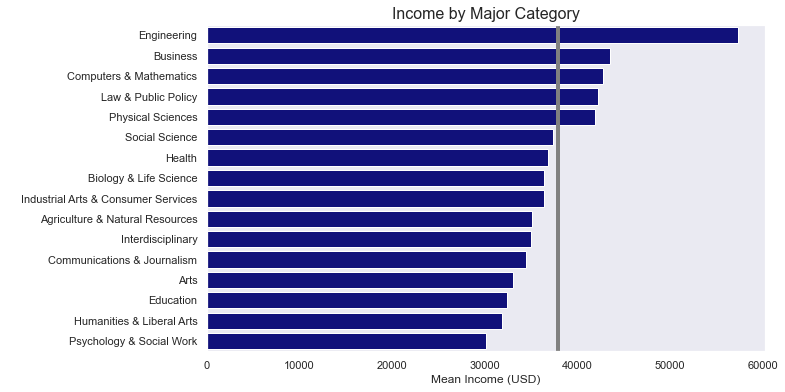

In [24]:
sns.set(style='dark')
plt.figure(figsize=(10,6))
bar1 = sns.barplot(y='Major_category',
                   x='Median_income',
                   data=sorted_categories1, 
                   color='darkblue',
                  )

plt.axvline(x=incomes.Median_income.mean(),
        color='gray', lw=4)

plt.title('Income by Major Category', fontsize=16)
plt.ylabel(" ")
plt.xlabel("Mean Income (USD)")
plt.show()

In [25]:
# stacked bar chart/income

def plot_incomes(sort):
    sns.set(style='dark')
    plt.figure(figsize=(10,6))
    bar1 = sns.barplot(y='Major_category',
                       x='Grad_median_income',
                       data=sort, 
                       color='lightblue',
                      )
    bar2 = sns.barplot(y='Major_category',
                       x='Median_income', 
                       data=sort, 
                       color='darkblue',
                      )
    plt.axvline(x=incomes.Median_income.mean(),
            color='gray', lw=4)
    plt.axvline(x=incomes.Grad_median_income.mean(),
            color='red', lw=4)
    
    # add legend
    top_bar = mpatches.Patch(color='darkblue', label='Undergraduates')
    bottom_bar = mpatches.Patch(color='lightblue', label='Graduates')
    plt.legend(handles=[top_bar, bottom_bar])
    
    plt.title('Income by Major Category', fontsize=16)
    plt.ylabel(" ")
    plt.xlabel("Mean Income (USD)")
    plt.show()

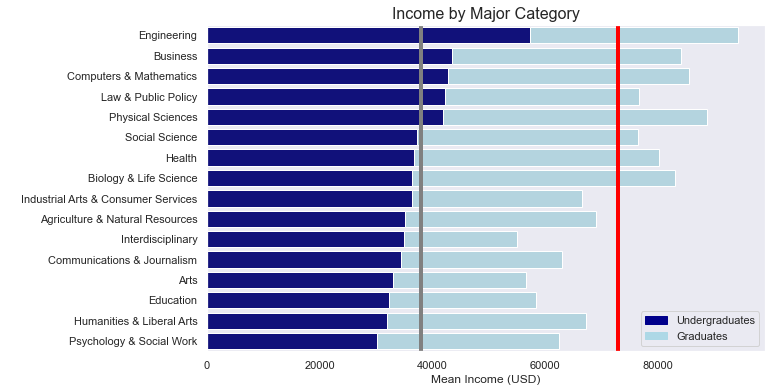

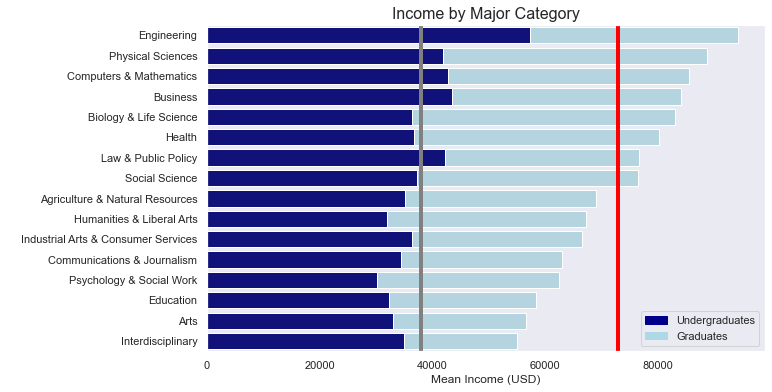

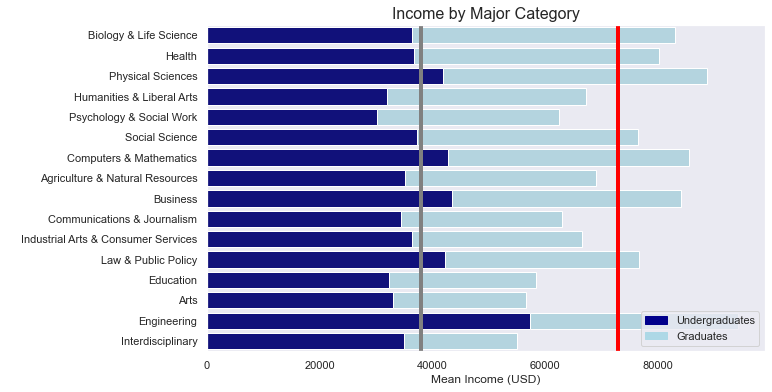

In [26]:
plot_incomes(sorted_categories1)
plot_incomes(sorted_categories2)
plot_incomes(sorted_categories3)

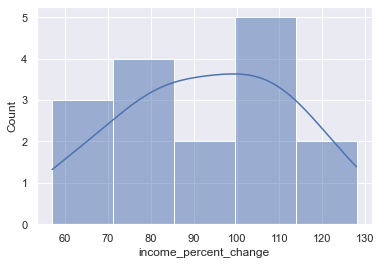

In [27]:
sns.set(style='darkgrid')
# plt.figure(figsize=(12,12))

sns.histplot(x='income_percent_change', data=incomes, kde=True)
plt.show()

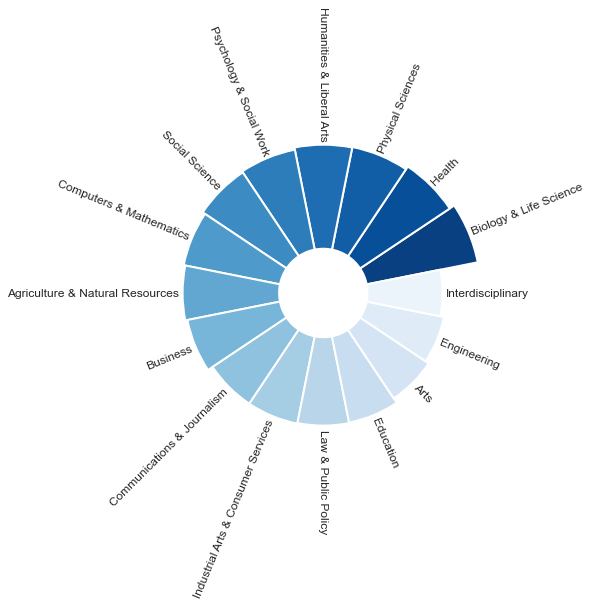

In [28]:
# initialize the figure
plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Set the coordinates limits
upperLimit = 130
lowerLimit = 50

# Compute max and min in the dataset
max = sorted_categories3['income_percent_change'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * sorted_categories3['income_percent_change'] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(sorted_categories3.Major_category)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(sorted_categories3.Major_category)+1))
angles = [element * width for element in indexes]
angles

pal = sns.color_palette("Blues", len(sorted_categories3))
# rank = [int((max(array)-elem)*len(sorted_categories3)*0.75/(max(array)+1)) for elem in array] 

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
#     color="#61a4b2",
    color=pal[::-1]
)

# little space between the bar and the label
labelPadding = 4

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, sorted_categories3.Major_category):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

In [33]:
top_changed_cats = ['Biology & Life Science', 'Physical Sciences', 'Humanities & Liberal Arts']
bottom_changed_cats = ['Education', 'Arts', 'Engineering']

def get_violins(cats):
    data1 = recent_grads[recent_grads.Major_category.isin(cats)]
    data2 = grad_students[grad_students.Major_category.isin(cats)]
    data1.rename(columns={'Median_income': 'Undergraduate Income'}, inplace=True)
    data2.rename(columns={'Grad_median_income': 'Graduate Income'}, inplace=True) 
    merged = pd.merge(data1, data2, on='Major_category', how='inner')
    data = pd.melt(merged, id_vars=['Major_category'], value_vars=['Undergraduate Income', 'Graduate Income'],
                   var_name='Group', value_name='Income')
    
    sns.set(style='darkgrid')
    my_pal = {'Undergraduate Income' : 'darkblue', 'Graduate Income': 'lightblue'}
    
    plt.figure(figsize=(12,10))
    cat1 = sns.violinplot(x='Major_category', y='Income', hue='Group',
                          data=data,
                          palette=my_pal,
                          split=True,
                          inner='quartile',
                          scale='count', # scales density relative to counts across all bins
                          bw=.6 # amount of smoothing
                         )
    
    plt.xlabel(" ")
    plt.xticks(fontsize=16)
    plt.ylabel("Income (USD)", fontsize=14)
    plt.yticks(fontsize=16)
    plt.title("Income for Undergraduates/Graduates by Category", fontsize=18)

C:\Users\anali\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\anali\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


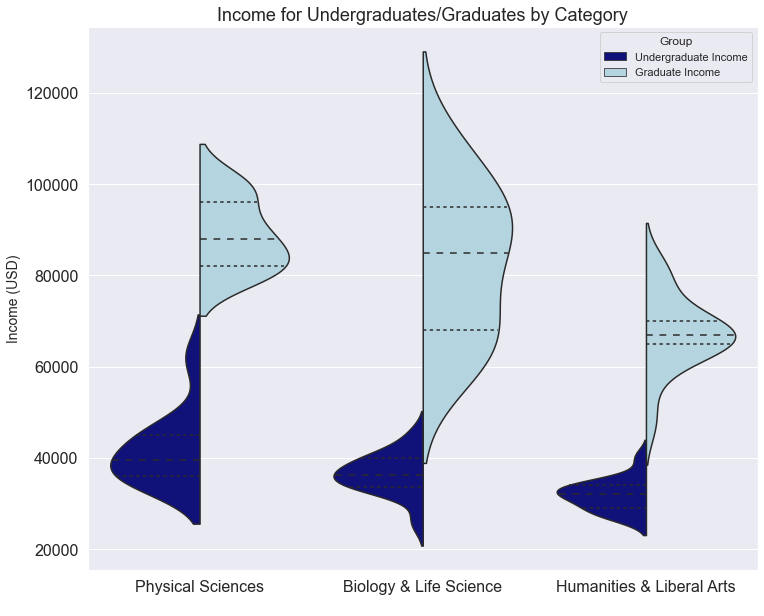

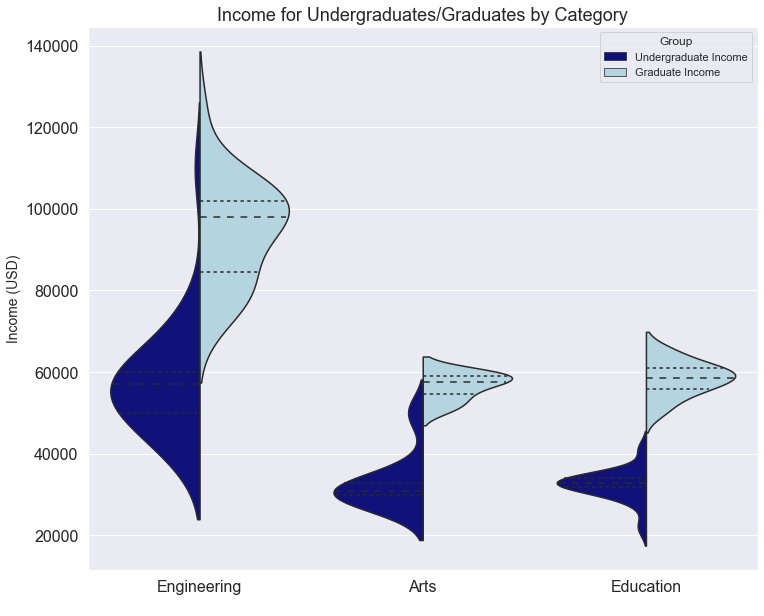

In [34]:
get_violins(top_changed_cats)
get_violins(bottom_changed_cats)